# Getting the necessary data

You just need to download this ~28 MB file only once

In [1]:
!rm -f SRR003265.filt.fastq.gz 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2015-08-06 12:55:05--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => ‘SRR003265.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[=====================>]  27.58M  2.36MB/s   in 11s    

2015-08-06 12:55:17 (2.42 MB/s) - ‘SRR003265.filt.fastq.gz’ saved [28919712]



# The recipe

In [2]:
from collections import defaultdict
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

In [3]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'), 'fastq')
rec = next(recs)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations)

('SRR003265.31', 'SRR003265.31 3042NAAXX:3:1:1252:1819 length=51', Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA', SingleLetterAlphabet()))
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


In [4]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'), 'fastq')
cnt = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1
tot = sum(cnt.values())
for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt / tot, cnt))

A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
G: 20.68 5359334
N: 0.14 37289


(1, 51)

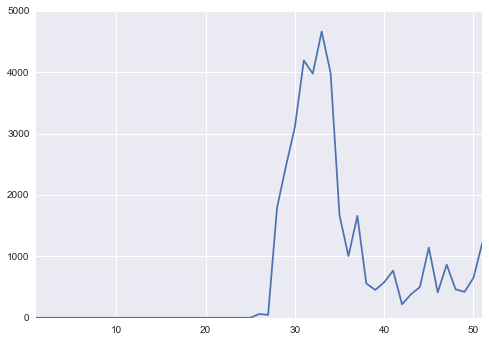

In [5]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots()
ax.plot(positions, [n_cnt[x] for x in positions])
ax.set_xlim(1, seq_len)

In [6]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

0: 0.40 52229
1: 1.52 200558
2: 3.77 498679
3: 4.04 533458
4: 4.77 630923
5: 4.88 645266
6: 2.50 330834
7: 2.51 331743
8: 2.53 334410
9: 2.51 332259
10: 4.95 654154
11: 2.41 318303
12: 2.35 309918
13: 2.28 301033
14: 2.20 291341
15: 2.12 280719
16: 2.05 270431
17: 1.97 259779
18: 1.88 248982
19: 1.81 239621
20: 1.73 228923
21: 1.66 219602
22: 1.59 209905
23: 1.52 201164
24: 1.46 193259
25: 1.40 184846
26: 1.33 176263
27: 1.28 168902
28: 1.23 162226
29: 1.17 154892
30: 1.13 149449
31: 1.08 142464
32: 1.03 136763
33: 0.99 131291
34: 0.95 125624
35: 0.91 120704
36: 0.88 115701
37: 0.84 111179
38: 0.80 106290
39: 0.78 102568
40: 22.76 3007221


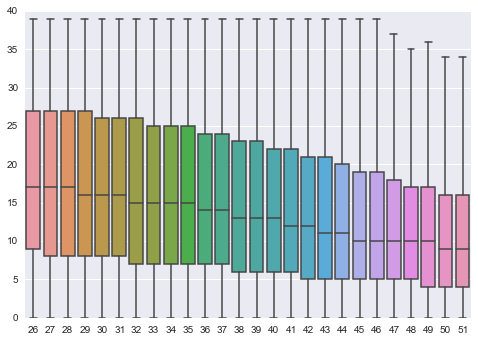

In [7]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = qual_pos.keys()
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots()
sns.boxplot(vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
pass

# There is more...

## Do this to download the paired end data

Be careful as this will be 1GB of data (and fully optional)

In [8]:
!rm -f SRR003265_1.filt.fastq.gz 2>/dev/null
!rm -f SRR003265_2.filt.fastq.gz 2>/dev/null
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data/NA18489/sequence_read/SRR003265_1.filt.fastq.gz
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data/NA18489/sequence_read/SRR003265_2.filt.fastq.gz

--2015-02-18 13:41:27--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data/NA18489/sequence_read/SRR003265_1.filt.fastq.gz
           => ‘SRR003265_1.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/data/NA18489/sequence_read ... done.
==> SIZE SRR003265_1.filt.fastq.gz ... 502660639
==> PASV ... done.    ==> RETR SRR003265_1.filt.fastq.gz ... done.
Length: 502660639 (479M) (unauthoritative)

100%[======================================>] 502,660,639 6.29MB/s   in 68s    

2015-02-18 13:42:36 (7.01 MB/s) - ‘SRR003265_1.filt.fastq.gz’ saved [502660639]

--2015-02-18 13:42:36--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data/NA18489/sequence_read/SRR003265_2.filt.fastq.gz
           => ‘SRR003265_2.filt.fastq.gz’
Resolving ftp.100

In [ ]:
f1 = gzip.open('SRR003265_1.filt.fastq.gz')
f2 = gzip.open('SRR003265_2.filt.fastq.gz')
recs1 = SeqIO.parse(f1, 'fastq')
recs2 = SeqIO.parse(f2, 'fastq')
cnt = 0
for rec1 in recs1:
    next(recs2)
    cnt +=1
print('Number of pairs: %d' % cnt)

## Only do the next cell on Python 3

In [ ]:
#f1 = gzip.open('SRR003265_1.filt.fastq.gz', 'rt', encoding='utf8')
#f2 = gzip.open('SRR003265_2.filt.fastq.gz', 'rt', encoding='utf8')
#recs1 = SeqIO.parse(f1, 'fastq')
#recs2 = SeqIO.parse(f2, 'fastq')
#cnt = 0
#for rec1, rec2 in zip(recs1, recs2):
#    cnt +=1
#
#print('Number of pairs: %d' % cnt)